In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [6]:
text = open('drive/MyDrive/Sentiment analysis/read.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

AttributeError: module 'nltk' has no attribute 'internals'

In [9]:
tokenized_words = word_tokenize(cleaned_text, "english")

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [ ]:
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [ ]:
emotion_list = []
with open('drive/MyDrive/Sentiment analysis/emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)

[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']
Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


In [ ]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    elif score['neg'] == score['pos']:
        print("Mixed Sentiment")
    else:
        print("Neutral Sentiment")

Positive Sentiment


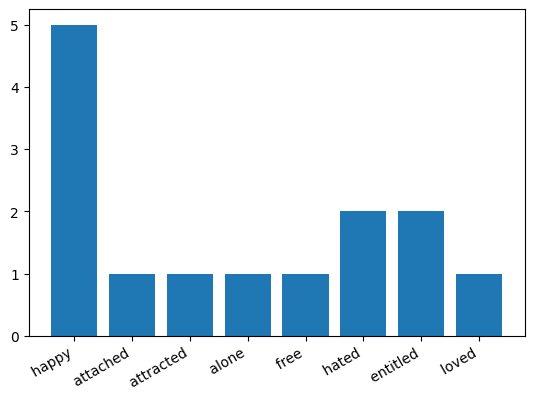

In [ ]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()